In [2]:
# Import libraries

import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [4]:
file = 'clean_ml_data_0625.csv'
clean_df = pd.read_csv(file)

In [5]:
clean_df.head()

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,intubation,ICU,new_age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [6]:
Counter(clean_df.death)

Counter({0: 1271359, 1: 146332})

In [7]:
y= clean_df['death']
X = clean_df.drop(columns = ['ICU','intubation','death'])
keep_columns = ["gender","pneumonia","diabetes","hypertension","obesity","closed_contact", "new_age"]
X2 = clean_df[keep_columns]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, stratify=y)

In [9]:
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,random_state =42, stratify=y)

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
results, names = list(), list()
sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(brf,  X_train, y_train, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)

# balanced_scores = cross_val_score(brf, X_train, y_train, cv = sk_folds, scoring=sc)
# print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)

# recall = cross_val_score(brf, X_train, y_train, cv = sk_folds, scoring='recall')
# print('Recall', np.mean(recall), recall)

# precision = cross_val_score(brf, X_train, y_train, cv = sk_folds, scoring='precision')
# print('Precision', np.mean(precision), precision)

# f1 = cross_val_score(brf, X_train, y_train, cv = sk_folds, scoring='f1')
# print('F1', np.mean(f1), f1)
names.append('All Features')
results.append(scores)

Accuracy 0.8512745605873491 [0.85144883 0.85116198 0.85172628 0.84975053 0.85228518]


In [14]:
scores = cross_val_score(brf,  X2_train, y_train, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)

# balanced_scores = cross_val_score(brf, X2_train, y_train, cv = sk_folds, scoring=sc)
# print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)

# recall = cross_val_score(brf, X2_train, y_train, cv = sk_folds, scoring='recall')
# print('Recall', np.mean(recall), recall)

# precision = cross_val_score(brf, X2_train, y_train, cv = sk_folds, scoring='precision')
# print('Precision', np.mean(precision), precision)

# f1 = cross_val_score(brf, X2_train, y_train, cv = sk_folds, scoring='f1')
# print('F1', np.mean(f1), f1)

names.append('7 Features')
results.append(scores)

Accuracy 0.8473414008449393 [0.84818061 0.84884366 0.84840633 0.84153527 0.84974113]


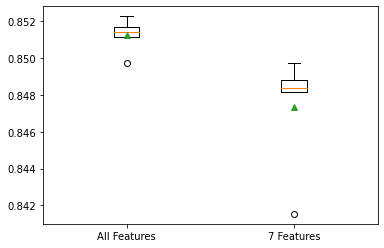

In [15]:
# plot model performance for comparison
from matplotlib import pyplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# # Extract feature importances from the fitted gradient boosting model
# feature_importances = brf.feature_importances_

# # Get the indices of the largest to smallest feature importances
# sorted_index = np.argsort(feature_importances)
# x = np.arange(sorted_index.shape[0]) + .5
# # Create tick labels 
# labels = np.array(X.columns)[sorted_index]
# plt.figure(figsize=(8, 6))
# plt.barh(x, feature_importances[sorted_index], tick_label=labels)

# # Set the tick lables to be the feature names, according to the sorted feature_idx
# plt.yticks()
# plt.show()